In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

# Create Map

In [2]:
BOARD_ROWS = 6
BOARD_COLS = 6
GOOD_STATES = [(5, 0), (5, 5)]
BAD_STATES = [(0, 1), (0, 2), (2, 1), (3, 0), (3, 2), (4, 1), (4, 5), (5, 3)]
V_GOOD_STATES = [(0 ,4), (3, 5)]
V_BAD_STATES = [(0, 3), (0, 5), (1, 3), (2, 5), (3, 3)]
START_STATE = (3, 2)
WALLS = [(1, 0), (1, 2), (1, 5), (2, 4), (4, 4), (5, 2)]
GAMMA = 0.99
EPSILON = 1e-6
REWARD = -0.04
NUM_OF_ACTIONS = 4
ACTIONS = [(-1, 0), (0, -1), (1, 0), (0, 1)]

# Create Utility Functions

In [3]:
def get_state(states, row, col, action):
    # Get the state of taking the given action
    temp_row = row + ACTIONS[action][0]
    temp_col = col + ACTIONS[action][1]
    if temp_row < 0 or temp_row >= BOARD_ROWS or temp_col < 0 or temp_col >= BOARD_COLS or (temp_row, temp_col) in WALLS:
        return states[row][col]
    else:
        return states[temp_row][temp_col]

In [4]:
def utility_score(states, row, col, action):
    # Evaluate the expected utility score of taking the given action in the given state
    utility = REWARD
    if (row, col) in GOOD_STATES:
        utility = 1
    elif (row, col) in BAD_STATES:
        utility = -1
    elif (row, col) in V_GOOD_STATES:
        utility = 5
    elif (row, col) in V_BAD_STATES:
        utility = -3
    utility += 0.1 * (GAMMA * get_state(states, row, col, (action - 1) % 4))
    utility += 0.1 * (GAMMA * get_state(states, row, col, (action + 1) % 4))
    utility += 0.8 * (GAMMA * get_state(states, row, col, action))
    return utility

In [5]:
def get_policy(states):
    # Get the optimal policy for each state
    policy = np.zeros((BOARD_ROWS, BOARD_COLS))
    for row in range(BOARD_ROWS):
        for col in range(BOARD_COLS):
            if (row, col) in GOOD_STATES or (row, col) in BAD_STATES or (row, col) in WALLS:
                continue
            best_action = None
            best_utility = float('-inf')
            for action in range(NUM_OF_ACTIONS):
                utility = utility_score(states, row, col, action)
                if utility > best_utility: 
                    best_utility = utility
                    best_action = action
            policy[row][col] = best_action
    return policy

# Create Print Functions

In [6]:
def print_policy(matrix):
    for row in range(BOARD_ROWS):
        print("|", end="")
        for col in range(BOARD_COLS):
            if (row, col) in WALLS:
                print(" Wall ", end=" | ")
            else:
                if matrix[row][col] == 0:
                    print("  Up  ", end=" | ")
                elif matrix[row][col] == 1:
                    print(" Left ", end=" | ")
                elif matrix[row][col] == 2:
                    print(" Down ", end=" | ")
                elif matrix[row][col] == 3:
                    print(" Right", end=" | ")
        print()

In [7]:
def print_states(matrix):
    for row in range(BOARD_ROWS):
        print("|", end="")
        for col in range(BOARD_COLS):
            if (row, col) in WALLS:
                print(" Wall", end="|")
            else:
                print(str(matrix[row][col])[:5], end="|")
        print()

# Part 1 Value Iteration

In [8]:
utility_value_00 = []
utility_value_32 = []
utility_value_55 = []
def value_iteration(states):
    # find the value of the state until optimal
    iteration = 1
    while True: 
        print("Iteration " , iteration)
        next_state = copy.deepcopy(states)
        max_diff = 0
        for row in range(BOARD_ROWS):
            for col in range(BOARD_COLS):
                utilities = []
                for action in range(NUM_OF_ACTIONS):
                    utilities.append(utility_score(states, row, col, action))
                
                next_state[row][col] = max(utilities)
                max_diff = max(max_diff,abs(next_state[row][col]-states[row][col]))    
        
        states = next_state
        utility_value_00.append(states[0][0])
        utility_value_32.append(states[3][2])
        utility_value_55.append(states[5][5])
        print_states(states)
        
        if max_diff < EPSILON * (1-GAMMA)/GAMMA:
            break
        iteration += 1
    return states

In [9]:
all_states = np.zeros((BOARD_ROWS, BOARD_COLS))
for state in GOOD_STATES:
    all_states[state] = 1
for state in BAD_STATES:
    all_states[state] = -1

In [10]:
print("Map")
print("")
print_states(all_states)

Map

|0.0|-1.0|-1.0|0.0|0.0|0.0|
| Wall|0.0| Wall|0.0|0.0| Wall|
|0.0|-1.0|0.0|0.0| Wall|0.0|
|-1.0|0.0|-1.0|0.0|0.0|0.0|
|0.0|-1.0|0.0|0.0| Wall|-1.0|
|1.0|0.0| Wall|-1.0|0.0|1.0|


In [11]:
all_states = value_iteration(all_states)
optimal_policy = get_policy(all_states)

Iteration  1
|-0.04|-1.09|-1.19|-3.0|5.0|-3.0|
| Wall|-0.23| Wall|-3.0|-0.04| Wall|
|-0.13|-1.0|-0.13|-0.04| Wall|-3.0|
|-1.0|-1.03|-1.0|-3.0|-0.04|5.0|
|0.653|-1.0|-0.13|-0.04| Wall|-0.40|
|1.891|0.653| Wall|-1.09|0.752|1.891|
Iteration  2
|-0.07|-1.16|-2.10|0.366|8.366|0.366|
| Wall|-0.43| Wall|-3.33|3.619| Wall|
|-0.26|-1.21|-0.18|-0.66| Wall|0.366|
|-0.68|-1.03|-1.50|-3.03|3.912|8.622|
|1.423|-0.43|-0.18|-0.47| Wall|2.879|
|2.749|1.423| Wall|-0.51|1.606|2.759|
Iteration  3
|-0.11|-1.22|-1.12|3.332|11.69|3.698|
| Wall|-0.62| Wall|-0.16|6.614| Wall|
|-0.34|-1.29|-0.37|-0.81| Wall|3.901|
|-0.04|-0.59|-1.54|-0.01|7.563|12.15|
|2.235|0.249|-0.27|-0.51| Wall|6.399|
|3.590|2.235| Wall|0.173|2.463|3.743|
Iteration  4
|-0.15|-1.27|1.415|6.578|14.96|6.997|
| Wall|-0.78| Wall|2.487|9.863| Wall|
|-0.23|-1.39|-0.54|-0.16| Wall|7.395|
|0.707|0.000|-1.07|2.858|11.08|15.64|
|3.049|0.964|-0.02|0.019| Wall|9.890|
|4.420|3.049| Wall|0.917|3.412|6.682|
Iteration  5
|-0.19|-0.08|4.490|9.746|18.19|10.23

In [12]:
print("Optimal Policy")
print("")
print_policy(optimal_policy)

Optimal Policy

| Right |   Up   |   Up   |  Right |   Up   |  Left  | 
| Wall  |  Down  |  Wall  |  Down  |   Up   |  Wall  | 
| Right |   Up   |  Right |  Down  |  Wall  |  Down  | 
|  Up   |  Right |   Up   |  Right |  Right |  Right | 
| Right |   Up   |  Right |   Up   |  Wall  |   Up   | 
|  Up   |   Up   |  Wall  |   Up   |  Right |   Up   | 


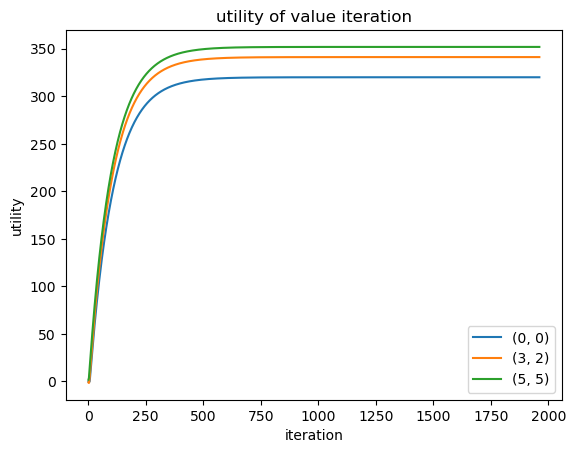

In [13]:
x = range(1, len(utility_value_00) + 1)

plt.plot(x, utility_value_00, label = "(0, 0)")
plt.plot(x, utility_value_32, label = "(3, 2)")
plt.plot(x, utility_value_55, label = "(5, 5)")
plt.title("utility of value iteration")
plt.xlabel("iteration")
plt.ylabel("utility")
plt.legend()
plt.show()

# Part 2 Policy Iteration

In [14]:
def policy_making(policy, states):
    # find a utility from the given policy
    max_diff = 0
    while True:
        next_state = copy.deepcopy(states)
        max_diff = 0
        for row in range(BOARD_ROWS):
            for col in range(BOARD_COLS):
                next_state[row][col] = utility_score(states, row, col, policy[row][col])
                max_diff = max(max_diff, abs(next_state[row][col] - states[row][col]))

        states = next_state
        if max_diff < EPSILON * (1 - GAMMA)/GAMMA:   
            break
    return states

In [15]:
utility_policy_00 = []
utility_policy_32 = []
utility_policy_55 = []
def policy_iteration(policy, state):
    # find better policy until optimal
    iteration = 1
    while True:
        state = policy_making(policy, state)
        modified = 0

        for row in range(BOARD_ROWS):
            for col in range(BOARD_COLS):
                best_action = None
                best_utility = -float("inf")
                for action in range(NUM_OF_ACTIONS):
                    ut = utility_score(state, row, col, action)
                    if ut > best_utility:
                        best_action = action     
                        best_utility = ut      
                    
                if best_utility > utility_score(state , row, col, policy[row][col]):
                    policy[row][col] = best_action
                    modified = 1

        print("Iteration ", iteration)
        utility_policy_00.append(state[0][0])
        utility_policy_32.append(state[3][2])
        utility_policy_55.append(state[5][5])
        print_policy(policy)

        if modified == 0:
            break
        iteration += 1

    return policy, state

In [16]:
all_states = np.zeros((BOARD_ROWS, BOARD_COLS))
for state in GOOD_STATES:
    all_states[state] = 1
for state in BAD_STATES:
    all_states[state] = -1
    
# randomly initialize all the policies
policy = [[random.randint(0,3) for j in range(BOARD_COLS)] for j in range(BOARD_ROWS)]

In [17]:
print("Map")
print("")
print_states(all_states)

Map

|0.0|-1.0|-1.0|0.0|0.0|0.0|
| Wall|0.0| Wall|0.0|0.0| Wall|
|0.0|-1.0|0.0|0.0| Wall|0.0|
|-1.0|0.0|-1.0|0.0|0.0|0.0|
|0.0|-1.0|0.0|0.0| Wall|-1.0|
|1.0|0.0| Wall|-1.0|0.0|1.0|


In [18]:
policy, all_states = policy_iteration(policy, all_states)
optimal_policy = get_policy(all_states)

Iteration  1
| Left  |  Right |  Right |  Right |   Up   |  Left  | 
| Wall  |   Up   |  Wall  |  Right |  Right |  Wall  | 
| Right |   Up   |  Right |   Up   |  Wall  |  Down  | 
| Right |   Up   |   Up   |   Up   |  Left  |  Down  | 
|  Up   |   Up   |  Left  |  Left  |  Wall  |  Down  | 
| Left  |  Left  |  Wall  |  Down  |  Left  |  Left  | 
Iteration  2
| Right |  Right |  Right |  Right |   Up   |  Left  | 
| Wall  |   Up   |  Wall  |   Up   |   Up   |  Wall  | 
| Right |   Up   |  Left  |   Up   |  Wall  |  Down  | 
|  Up   |   Up   |  Left  |   Up   |  Left  |  Left  | 
|  Up   |   Up   |  Left  |   Up   |  Wall  |   Up   | 
|  Up   |   Up   |  Wall  |   Up   |  Right |  Right | 
Iteration  3
| Right |  Right |  Right |  Right |   Up   |  Left  | 
| Wall  |   Up   |  Wall  |  Right |   Up   |  Wall  | 
| Right |   Up   |  Right |   Up   |  Wall  |  Down  | 
|  Up   |   Up   |  Right |   Up   |  Left  |  Right | 
|  Up   |   Up   |  Right |   Up   |  Wall  |   Up   | 
|  Up   |

In [19]:
print("Utility")
print("")
print_states(all_states)

Utility

|319.9|324.0|328.8|334.2|342.2|334.1|
| Wall|328.7| Wall|334.8|337.5| Wall|
|328.9|332.9|338.5|342.5| Wall|353.1|
|330.3|336.1|341.2|347.4|356.8|361.3|
|328.6|332.9|338.5|342.5| Wall|355.6|
|326.0|328.4| Wall|341.9|347.4|351.9|


In [20]:
print("Optimal Policy")
print("")
print_policy(optimal_policy)

Optimal Policy

| Right |   Up   |   Up   |  Right |   Up   |  Left  | 
| Wall  |  Down  |  Wall  |  Down  |   Up   |  Wall  | 
| Right |   Up   |  Right |  Down  |  Wall  |  Down  | 
|  Up   |  Right |   Up   |  Right |  Right |  Right | 
| Right |   Up   |  Right |   Up   |  Wall  |   Up   | 
|  Up   |   Up   |  Wall  |   Up   |  Right |   Up   | 


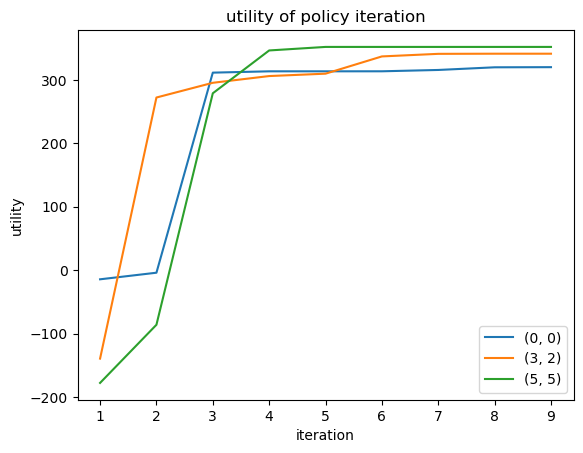

In [21]:
x = range(1, len(utility_policy_00) + 1)

plt.plot(x, utility_policy_00, label = "(0, 0)")
plt.plot(x, utility_policy_32, label = "(3, 2)")
plt.plot(x, utility_policy_55, label = "(5, 5)")
plt.title("utility of policy iteration")
plt.xlabel("iteration")
plt.ylabel("utility")
plt.legend()
plt.show()